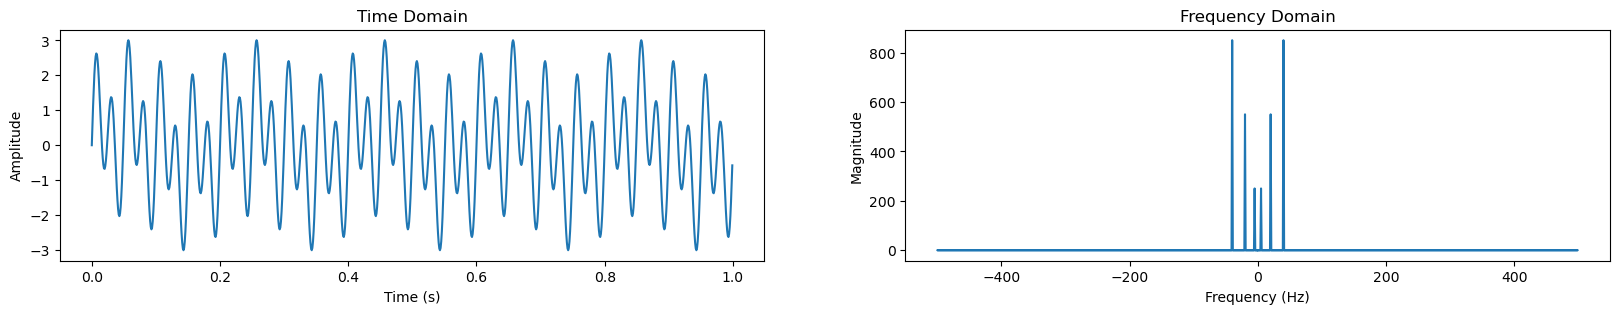

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def fft_example(signal):

    fft_result = np.fft.fft(signal)  # FFT
    freqs = np.fft.fftfreq(len(signal), 1/fs)  # Frequency bins

    return fft_result, freqs

fs = 1000  # Sampling frequency
t = np.arange(0, 1, 1/fs)  # Time vector
f1, f2, f3 = 5, 40, 20  # Frequencies
signal = 0.5*np.sin(2 * np.pi * f1 * t) + 1.7*np.sin(2 * np.pi * f2 * t) + 1.1*np.sin(2 * np.pi * f3 * t)   # Signal

fft_result, freqs = fft_example(signal)

# Plot
plt.figure(figsize=(20, 3))
plt.subplot(1, 2, 1)
plt.plot(t, signal)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time Domain")

plt.subplot(1, 2, 2)
plt.plot(freqs, np.abs(fft_result))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Domain")
plt.show()


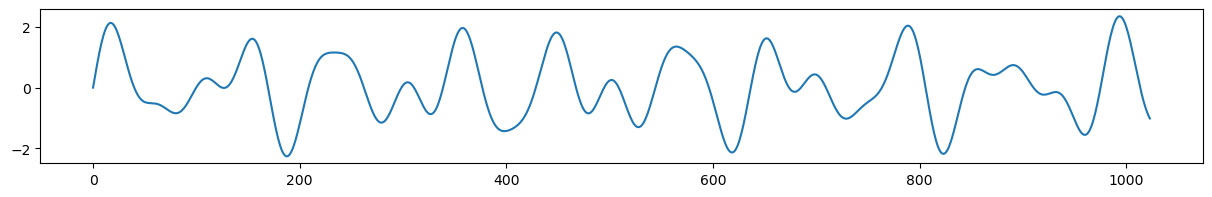

In [14]:
plt.figure(figsize=[15,2])
plt.plot(y)

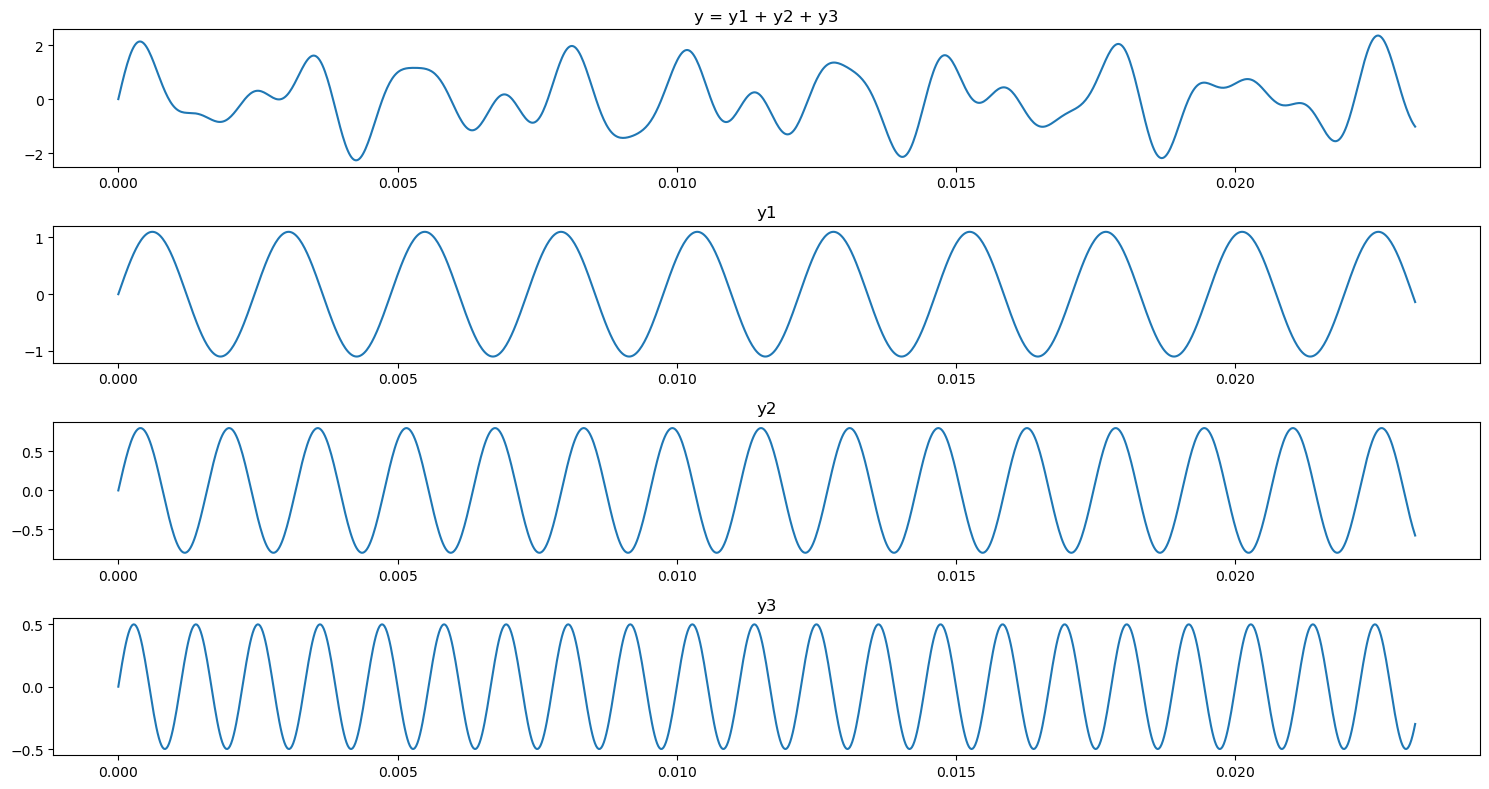

In [15]:
N = 1024
T = 1.0 / 44100.0
f1 = 410
f2 = 630
f3 = 900
t = np.linspace(0.0, N*T, N)
y1 = 1.1 * np.sin(2 * np.pi * f1 * t)
y2 = 0.8 * np.sin(2 * np.pi * f2 * t)
y3 = 0.5 * np.sin(2 * np.pi * f3 * t)
y = y1 + y2 + y3

plt.figure(figsize=[15,8])
plt.subplot(411)
plt.title("y = y1 + y2 + y3")
plt.plot(t, y)
plt.subplot(412)
plt.title("y1")
plt.plot(t, y1)
plt.subplot(413)
plt.title("y2")
plt.plot(t, y2)
plt.subplot(414)
plt.title("y3")
plt.plot(t, y3)
plt.tight_layout()
plt.show()

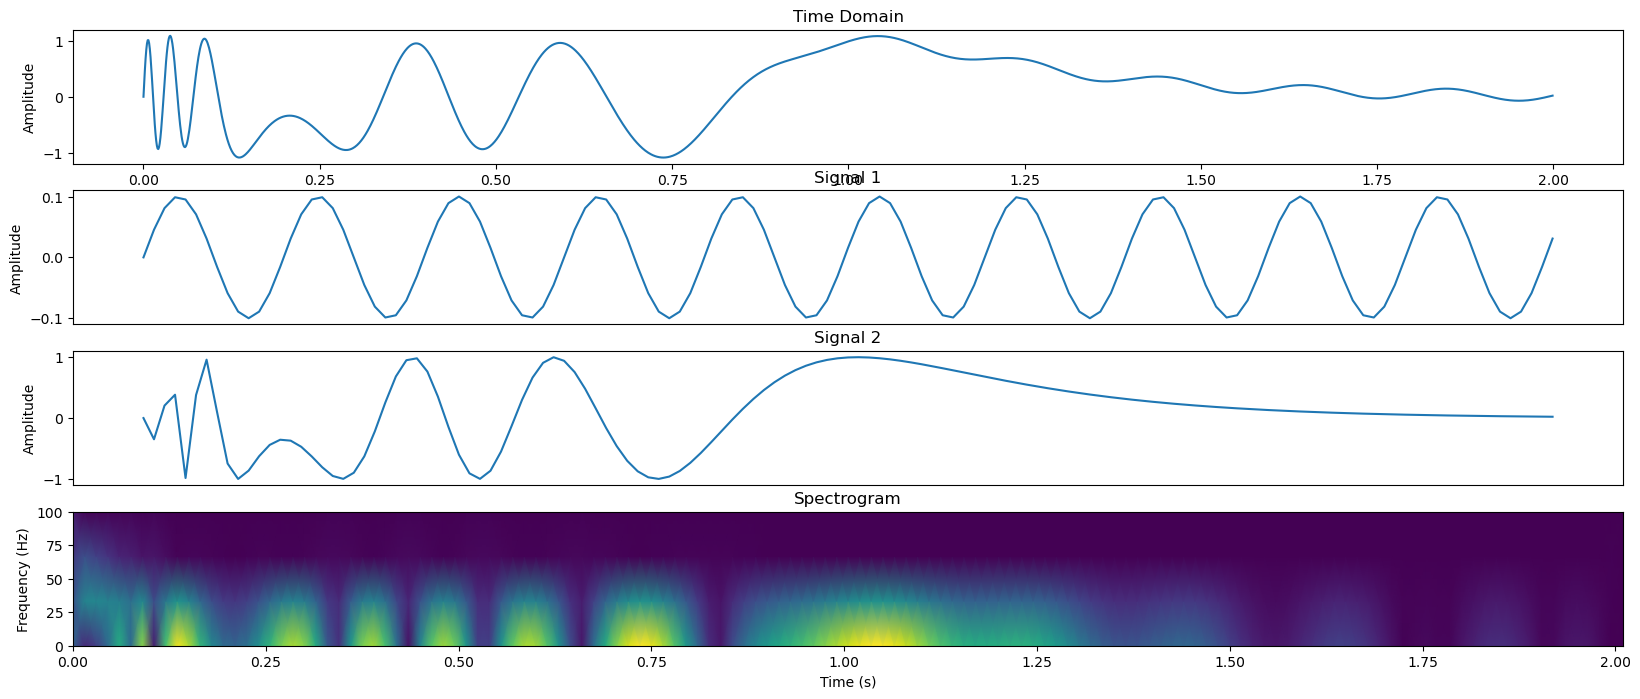

In [48]:

def stft_example(signal):
    f, t, Zxx = scipy.signal.stft(signal, fs, nperseg=30)
    return f, t, Zxx

fs = 1000
t = np.arange(0, 2, 1/fs)
f1, f2 = 5, 40
signal = 0.1*np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t * np.exp(-5*t))

f, t, Zxx = stft_example(signal)

plt.figure(figsize=(20, 8))
plt.subplot(4, 1, 1)
plt.plot(np.arange(0, 2, 1/fs), signal)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time Domain")

plt.subplot(4, 1, 2)
plt.plot(0.1*np.sin(2 * np.pi * f1 * t))
plt.gca().axes.xaxis.set_visible(False)
plt.ylabel("Amplitude")
plt.title("Signal 1")

plt.subplot(4, 1, 3)
plt.plot(np.sin(2 * np.pi * f2 * t * np.exp(-5*t)))
plt.gca().axes.xaxis.set_visible(False)
plt.ylabel("Amplitude")
plt.title("Signal 2")

ax_stft = plt.subplot(4, 1, 4)
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram")

ax_stft.set_ylim(0, 100)
plt.show()


Text(0.5, 1.0, 'Microsoft Stock Price')

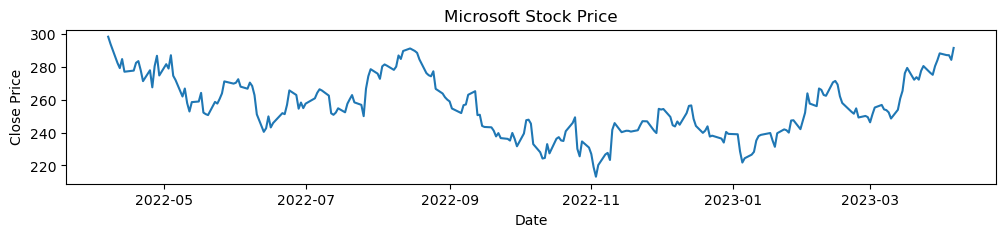

In [22]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal

# Fetch Microsoft stock data
msft = yf.Ticker("MSFT")
hist = msft.history(period="1y")  # Adjust the period as needed

# Calculate the STFT of the stock data
close_prices = hist['Close'].values
f, t, Zxx = scipy.signal.stft(close_prices, fs=1, nperseg=30, noverlap=20)

# Plot the stock graph
plt.figure(figsize=(12, 2))
plt.plot(hist['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Microsoft Stock Price')


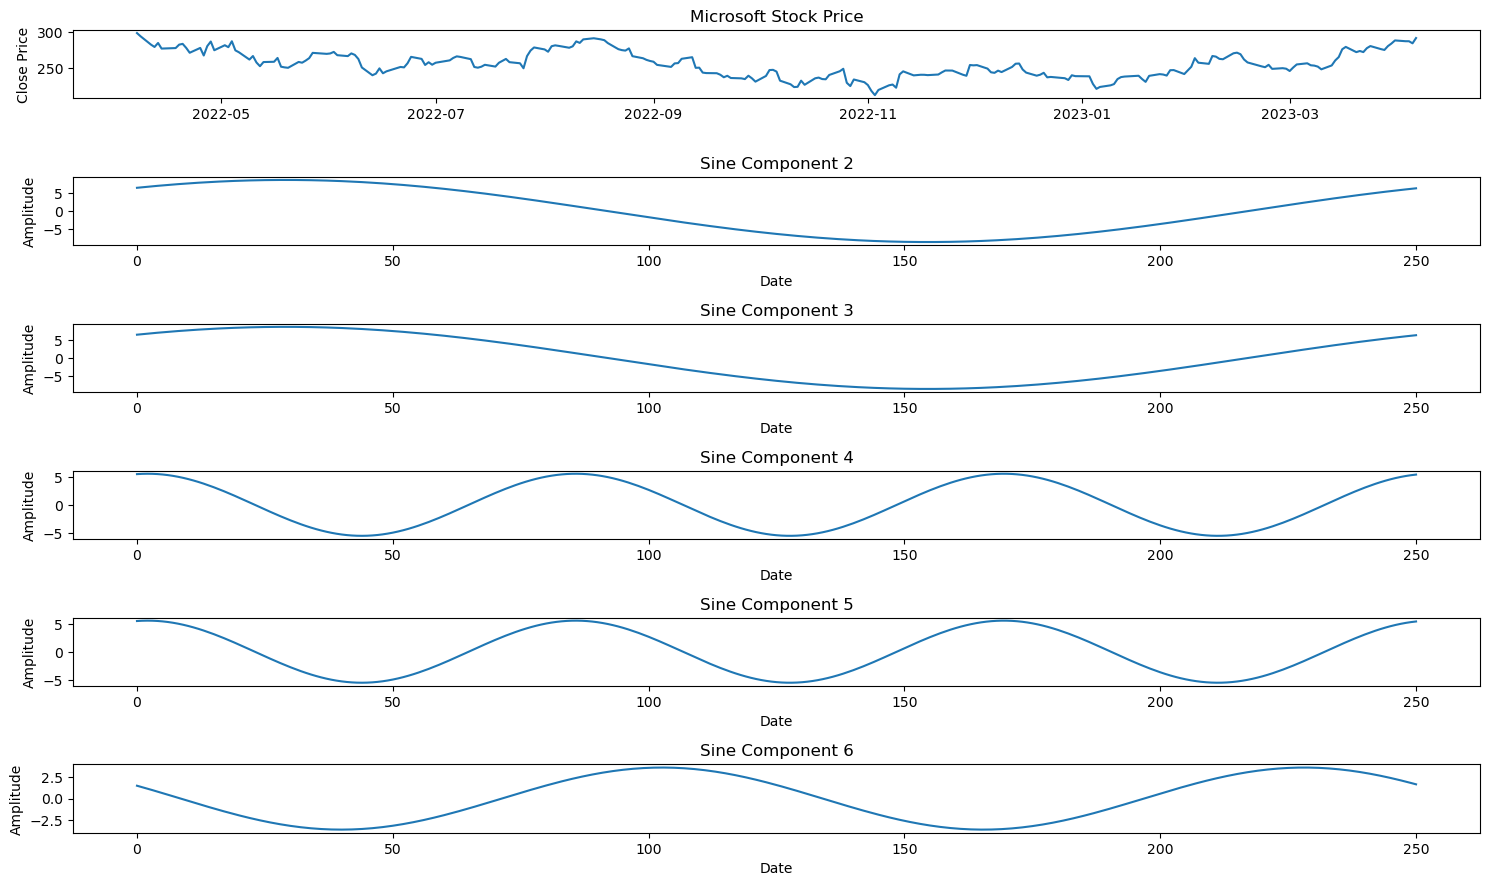

In [42]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Fetch Microsoft stock data
msft = yf.Ticker("MSFT")
hist = msft.history(period="1y")  # Adjust the period as needed

# Calculate the FFT of the stock data
close_prices = hist['Close'].values
fft = np.fft.fft(close_prices)

# Frequencies corresponding to the FFT coefficients
freqs = np.fft.fftfreq(len(close_prices))

# Number of sine components to display
num_components = 6

# Plot the stock graph
plt.figure(figsize=(15, 10))
plt.subplot(num_components + 1, 1, 1)
plt.plot(hist['Close'])
plt.ylabel('Close Price')
plt.title('Microsoft Stock Price')

# Calculate and plot the sine components
for i in range(1, num_components):
    # Zero out all other FFT coefficients except for the current one
    temp_fft = np.zeros_like(fft)
    temp_fft[np.argsort(np.abs(fft))[-(i + 1)]] = fft[np.argsort(np.abs(fft))[-(i + 1)]]

    # Perform the Inverse FFT to obtain the sine component
    ifft_result = np.fft.ifft(temp_fft).real
    
    plt.subplot(num_components + 1, 1, i + 1)
    plt.plot(ifft_result)
    plt.xlabel('Date')
    plt.ylabel('Amplitude')
    plt.title(f'Sine Component {i + 1}')

plt.tight_layout()
plt.show()

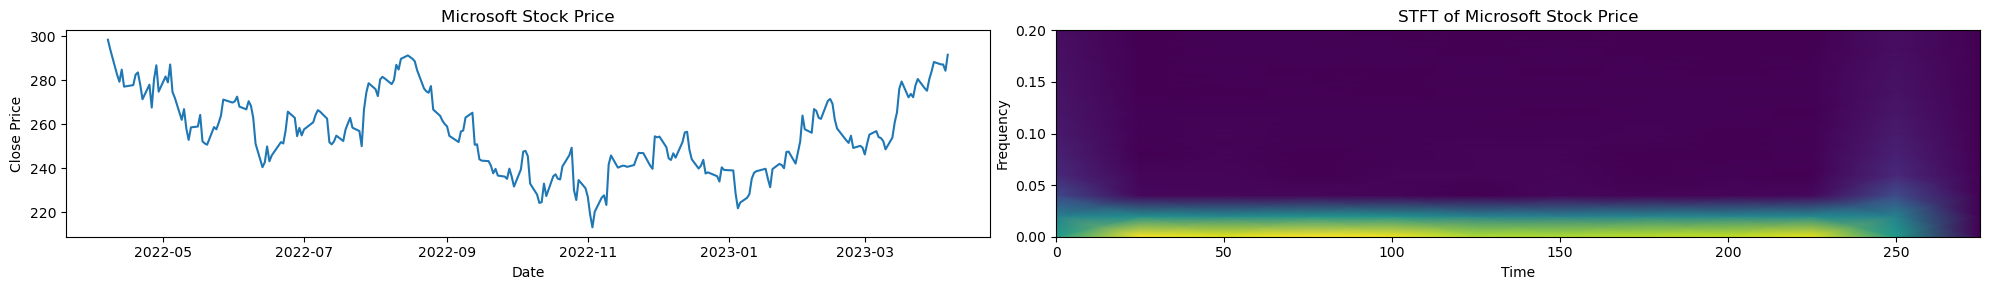

In [31]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal

# Fetch Microsoft stock data
msft = yf.Ticker("MSFT")
hist = msft.history(period="1y")  # Adjust the period as needed

# Calculate the STFT of the stock data
close_prices = hist['Close'].values
f, t, Zxx = scipy.signal.stft(close_prices, fs=1, nperseg=50)

# Plot the stock graph
plt.figure(figsize=(20, 3))
plt.subplot(1, 2, 1)
plt.plot(hist['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Microsoft Stock Price')

# Plot the STFT graph
ax_stft = plt.subplot(1, 2, 2)
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('STFT of Microsoft Stock Price')
plt.tight_layout()
ax_stft.set_ylim(0, 0.2)
plt.show()

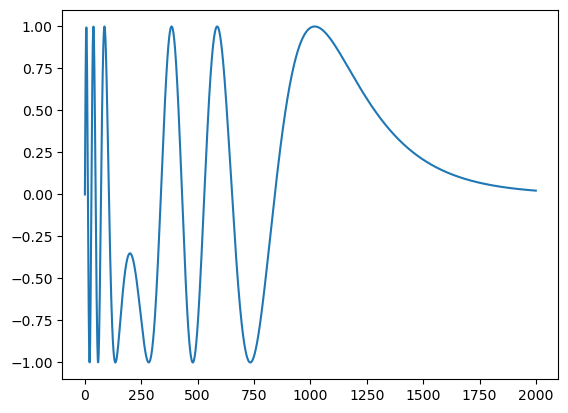

In [34]:
fs = 1000
t = np.arange(0, 2, 1/fs)
f1, f2 = 5, 40
plt.plot(np.sin(2 * np.pi * f2 * t * np.exp(-5*t)))